# SVM Regression

SVM 알고리즘은 linear, non-linear classification뿐만 아니라, linear, non-linear regression에도 사용할 수 있다. Regression에서는 classification과 반대로 margin violation(regression에서는 instance가 street 밖에 있는 경우)을 제한하며 가능한 많은 instance들이 street안에 오도록 하는 것이다.

이러한 street의 너비(margin)는 hyperparameter $\epsilon$을 통해 조절된다. 아래 그림은 $\epsilon$에 따른 linear SVM Regression model을 비교한 것이다.

<br/>
<img src="./images/svm_regression.png" alt="svm_regression"> 
<br/>

위 결과에서, $\epsilon$이 작을수록, margin이 커진다는 것을 알 수 있다. 또한, margin의 안쪽 영역에 해당하는 새로운 training instance들을 추가해 학습시키더라도, model의 prediction에는 영향을 미치지 않는다. 따라서 이 model을 **$\epsilon$-insensitive**하다고 말한다.

사이킷런에서는 `LinearSVR` class를 통해 linear SVM Regression을 수행할 수 있다. (학습 전에 training data는 scaled and centered 되어야 한다.) 아래 코드는 위 그림의 왼쪽 모델을 구현한 코드이다.

In [1]:
import numpy as np

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

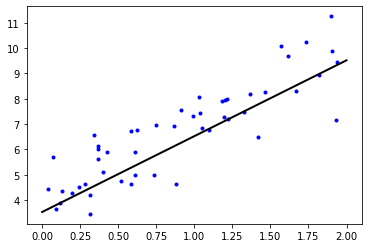

In [2]:
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

x1s = np.linspace(0, 2, 100).reshape(100, 1)
y_preds = svm_reg.predict(x1s)

plt.plot(X, y, 'b.')
plt.plot(x1s, y_preds, 'k', linewidth=2)
plt.show()

Nonlinear task의 경우, kernelized SVM 모델을 사용할 수 있다. 예를 들어, random quadratic training set의 경우, 아래 그림과 같이 2nd-degree polynomial kernel을 사용하면 된다. 

왼쪽의 경우, `C`값을 크게 주어 regularization을 약하게 적용하였고, 오른쪽의 경우는 그 반대이다.

<br/>
<img src="./images/svm_regression_using_2nd_degree_polynomial_kernel.png" alt="svm_regression_using_2nd_degree_polynomial_kernel"> 
<br/>

사이킷런에서는 `SVR` class를 사용해 이를 수행할 수 있다. 아래 코드는 위 그림의 왼쪽 모델을 구현한 것이다.

In [3]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

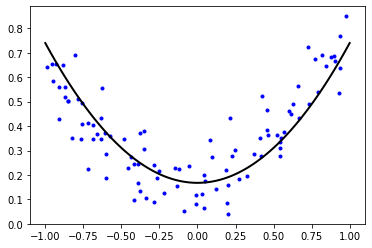

In [4]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(X, y)

x1s = np.linspace(-1, 1, 100).reshape(100, 1)
y_preds = svm_reg.predict(x1s)

plt.plot(X, y, 'b.')
plt.plot(x1s, y_preds, 'k', linewidth=2)
plt.show()

`LinearSVR`은 `LinearSVC`에 대응되므로, training set의 size에 따라 training time complexity가 linear하게 증가한다. 마찬가지로 `SVR`도 `SVC`에 대응되므로, training set이 커질수록 매우 느려지게 된다.